In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas numpy scikit-learn tensorflow
!pip install openpyxl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense



In [4]:
#Loading the dataset
DataSet = pd.read_csv("/content/drive/MyDrive/updated-Web-App-2/Dungent_Hunter_preprocessing.csv")

In [5]:
#Printing the columns of the dataset
for col in DataSet.columns:
    print(col)

label
full_text
digit


In [6]:
DataSet.head()

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1


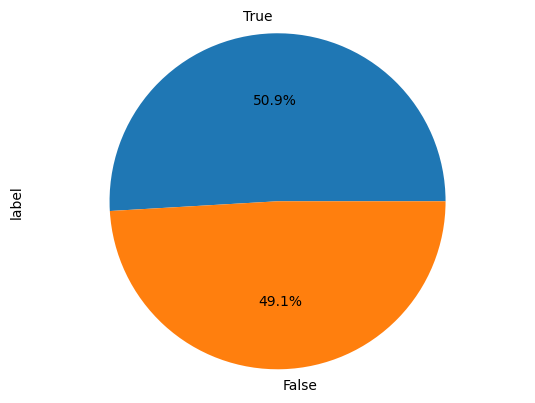

In [7]:
#Plotting the pie chart for label distribution
DataSet['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [8]:
#Preprocessing the data
texts = DataSet['full_text'].astype(str)
labels = DataSet['label']

In [9]:
#Converting labels to binary form (0 and 1)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [10]:
#Splitting the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)

In [11]:
#Tokenizing and padding the sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_sequence_length = max(len(seq) for seq in train_sequences)

train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [12]:
#Creating the LSTM model
model = Sequential()
model.add(Embedding(10000, 128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Training the LSTM model
history = model.fit(train_data, train_labels, epochs=5, batch_size=16, validation_data=(test_data, test_labels))

# Evaluating the LSTM model
_, accuracy = model.evaluate(test_data, test_labels)
print('Accuracy:', accuracy)

Epoch 1/5
2365/2365 [==============================] - 460s 191ms/step - loss: 0.2233 - accuracy: 0.8977 - val_loss: 0.1564 - val_accuracy: 0.9209
Epoch 2/5
2365/2365 [==============================] - 304s 129ms/step - loss: 0.1261 - accuracy: 0.9338 - val_loss: 0.1301 - val_accuracy: 0.9282
Epoch 3/5
2365/2365 [==============================] - 272s 115ms/step - loss: 0.1100 - accuracy: 0.9410 - val_loss: 0.1303 - val_accuracy: 0.9298
Epoch 4/5
2365/2365 [==============================] - 266s 113ms/step - loss: 0.0972 - accuracy: 0.9515 - val_loss: 0.1455 - val_accuracy: 0.9198
Epoch 5/5
507/507 [==============================] - 18s 35ms/step - loss: 0.1614 - accuracy: 0.9218
Accuracy: 0.9218479990959167


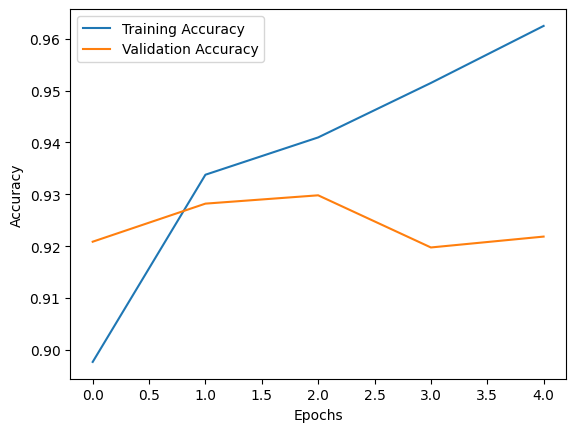

In [14]:
#Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
#Predicting on test data
predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]


507/507 [==============================] - 17s 33ms/step


In [16]:
# Creating confusion matrix
cm = tf.math.confusion_matrix(test_labels, predicted_labels)


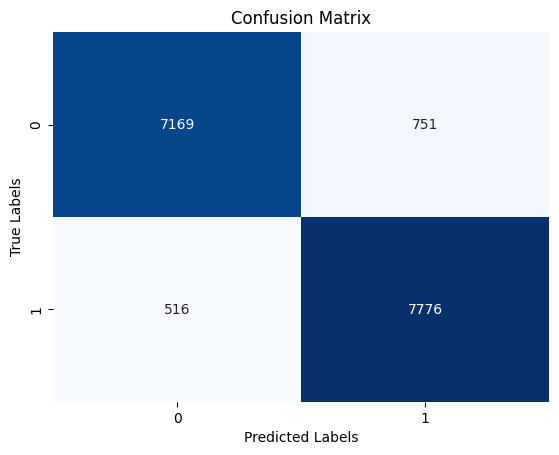

In [17]:
# Plotting confusion matrix as heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### <font color="Orange">Save Model</font>

In [18]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [19]:
model.save("test_model.h5")